<a href="https://colab.research.google.com/github/sheikh495/MachineLearning/blob/main/M6_Book_Examples_fchollet_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [10]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 83ms/step - loss: 0.5235 - accuracy: 0.7745 - val_loss: 0.4005 - val_accuracy: 0.8589
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3181 - accuracy: 0.8965 - val_loss: 0.3117 - val_accuracy: 0.8839
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2336 - accuracy: 0.9227 - val_loss: 0.2833 - val_accuracy: 0.8884
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1879 - accuracy: 0.9359 - val_loss: 0.2756 - val_accuracy: 0.8906
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1566 - accuracy: 0.9483 - val_loss: 0.2831 - val_accuracy: 0.8844
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1304 - accuracy: 0.9583 - val_loss: 0.3034 - val_accuracy: 0.8849
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1159 - accuracy: 0.9635 - val_loss: 0.3355 - val_accuracy: 0.8764
Epoch 8/20
30

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

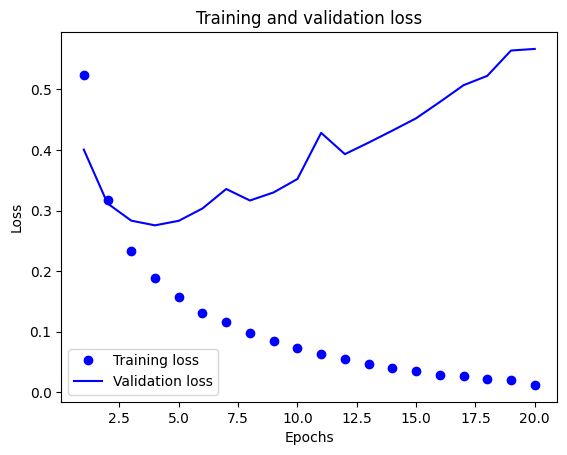

In [14]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

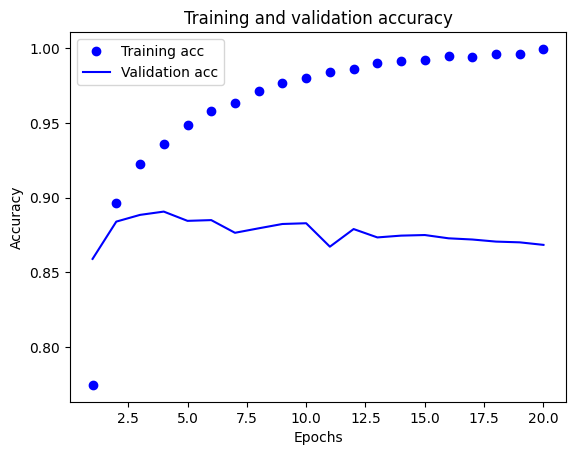

In [15]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [16]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 24ms/step - loss: 0.4539 - accuracy: 0.8146
Epoch 2/4
49/49 [==============================] - 1s 23ms/step - loss: 0.2683 - accuracy: 0.9050
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2114 - accuracy: 0.9250
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2921 - accuracy: 0.8834


In [17]:
results

[0.2920801639556885, 0.8834400177001953]

### Using a trained model to generate predictions on new data

In [18]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.17030364],
       [0.9997525 ],
       [0.64302045],
       ...,
       [0.08636284],
       [0.04896928],
       [0.45665288]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [19]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [20]:
len(train_data)

8982

In [21]:
len(test_data)

2246

In [22]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [23]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [24]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [25]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [26]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [27]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [28]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [29]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [30]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [31]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 69ms/step - loss: 2.8209 - accuracy: 0.5174 - val_loss: 1.9103 - val_accuracy: 0.6310
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.5771 - accuracy: 0.6820 - val_loss: 1.3850 - val_accuracy: 0.6900
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 1.1832 - accuracy: 0.7428 - val_loss: 1.1960 - val_accuracy: 0.7400
Epoch 4/20
16/16 [==============================] - 1s 49ms/step - loss: 0.9648 - accuracy: 0.7900 - val_loss: 1.0937 - val_accuracy: 0.7620
Epoch 5/20
16/16 [==============================] - 1s 46ms/step - loss: 0.7965 - accuracy: 0.8309 - val_loss: 1.0165 - val_accuracy: 0.7810
Epoch 6/20
16/16 [==============================] - 1s 66ms/step - loss: 0.6680 - accuracy: 0.8555 - val_loss: 0.9721 - val_accuracy: 0.7930
Epoch 7/20
16/16 [==============================] - 1s 80ms/step - loss: 0.5587 - accuracy: 0.8799 - val_loss: 0.9400 - val_accuracy: 0.8090
Epoch 8/20
16

**Plotting the training and validation loss**

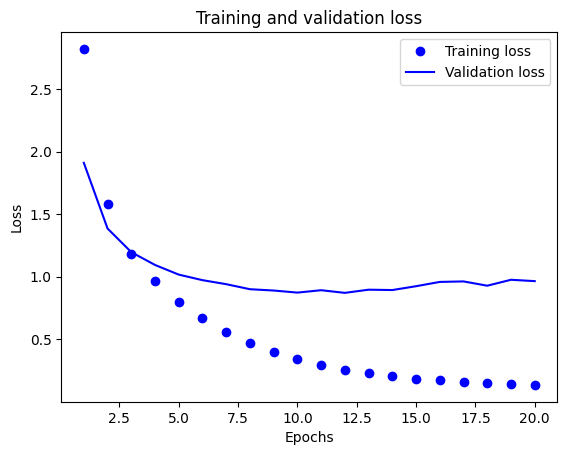

In [32]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

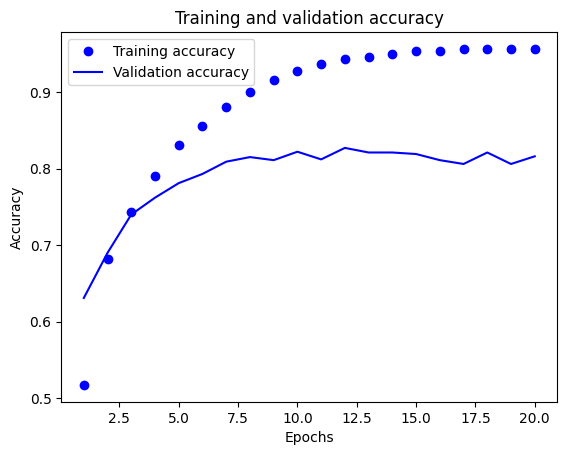

In [33]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [34]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 45ms/step - loss: 2.7407 - accuracy: 0.4972
Epoch 2/9
18/18 [==============================] - 1s 43ms/step - loss: 1.4791 - accuracy: 0.6936
Epoch 3/9
18/18 [==============================] - 1s 40ms/step - loss: 1.1165 - accuracy: 0.7627
Epoch 4/9
18/18 [==============================] - 1s 41ms/step - loss: 0.9120 - accuracy: 0.8045
Epoch 5/9
18/18 [==============================] - 1s 40ms/step - loss: 0.7504 - accuracy: 0.8392
Epoch 6/9
18/18 [==============================] - 1s 40ms/step - loss: 0.6260 - accuracy: 0.8651
Epoch 7/9
18/18 [==============================] - 1s 40ms/step - loss: 0.5258 - accuracy: 0.8886
Epoch 8/9
18/18 [==============================] - 1s 41ms/step - loss: 0.4440 - accuracy: 0.9065
Epoch 9/9
71/71 [==============================] - 0s 4ms/step - loss: 0.8973 - accuracy: 0.7974


In [35]:
results

[0.8973474502563477, 0.7974176406860352]

In [36]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19634906500445237

### Generating predictions on new data

In [37]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 4ms/step


In [38]:
predictions[0].shape

(46,)

In [39]:
np.sum(predictions[0])

0.99999994

In [40]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [41]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [42]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [43]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 20ms/step - loss: 2.9584 - accuracy: 0.3192 - val_loss: 2.2677 - val_accuracy: 0.4180
Epoch 2/20
63/63 [==============================] - 1s 16ms/step - loss: 1.9490 - accuracy: 0.5316 - val_loss: 1.7370 - val_accuracy: 0.5660
Epoch 3/20
63/63 [==============================] - 1s 15ms/step - loss: 1.5707 - accuracy: 0.5896 - val_loss: 1.5449 - val_accuracy: 0.5940
Epoch 4/20
63/63 [==============================] - 1s 15ms/step - loss: 1.3796 - accuracy: 0.6273 - val_loss: 1.4427 - val_accuracy: 0.6260
Epoch 5/20
63/63 [==============================] - 1s 18ms/step - loss: 1.2456 - accuracy: 0.6560 - val_loss: 1.3830 - val_accuracy: 0.6430
Epoch 6/20
63/63 [==============================] - 1s 24ms/step - loss: 1.1436 - accuracy: 0.6956 - val_loss: 1.3424 - val_accuracy: 0.6650
Epoch 7/20
63/63 [==============================] - 1s 20ms/step - loss: 1.0668 - accuracy: 0.7331 - val_loss: 1.3283 - val_accuracy: 0.6790
Epoch 8/20
63

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [44]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [45]:
train_data.shape

(404, 13)

In [46]:
test_data.shape

(102, 13)

In [47]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [48]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [49]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [50]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [51]:
all_scores

[1.769335150718689, 2.430072069168091, 2.5924577713012695, 2.5668153762817383]

In [52]:
np.mean(all_scores)

2.339670091867447

**Saving the validation logs at each fold**

In [53]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [54]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

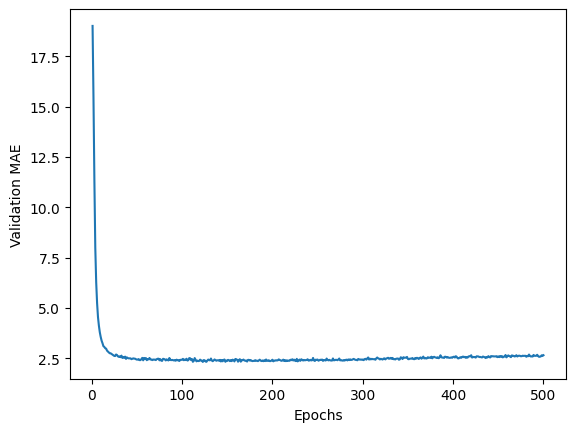

In [55]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

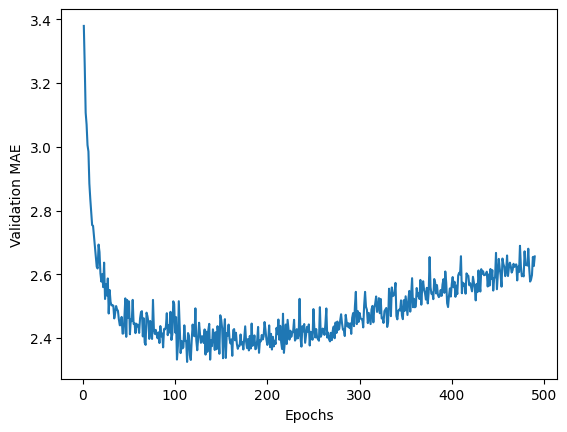

In [56]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [57]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 15.7186 - mae: 2.6921


In [58]:
test_mae_score

2.6921043395996094

### Generating predictions on new data

In [59]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 3ms/step


array([8.9580345], dtype=float32)

### **ADD new**

In [61]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"])


Epoch 1/20
40/40 [==============================] - 2s 42ms/step - loss: 0.4958 - accuracy: 0.7962 - val_loss: 0.3589 - val_accuracy: 0.8740
Epoch 2/20
40/40 [==============================] - 2s 38ms/step - loss: 0.2963 - accuracy: 0.8973 - val_loss: 0.3076 - val_accuracy: 0.8788
Epoch 3/20
40/40 [==============================] - 3s 73ms/step - loss: 0.2243 - accuracy: 0.9219 - val_loss: 0.2793 - val_accuracy: 0.8862
Epoch 4/20
40/40 [==============================] - 3s 64ms/step - loss: 0.1869 - accuracy: 0.9317 - val_loss: 0.2730 - val_accuracy: 0.8928
Epoch 5/20
40/40 [==============================] - 1s 29ms/step - loss: 0.1635 - accuracy: 0.9428 - val_loss: 0.3729 - val_accuracy: 0.8590
Epoch 6/20
40/40 [==============================] - 1s 28ms/step - loss: 0.1413 - accuracy: 0.9520 - val_loss: 0.3176 - val_accuracy: 0.8790
Epoch 7/20
40/40 [==============================] - 2s 45ms/step - loss: 0.1277 - accuracy: 0.9568 - val_loss: 0.3700 - val_accuracy: 0.8638
Epoch 8/20
40

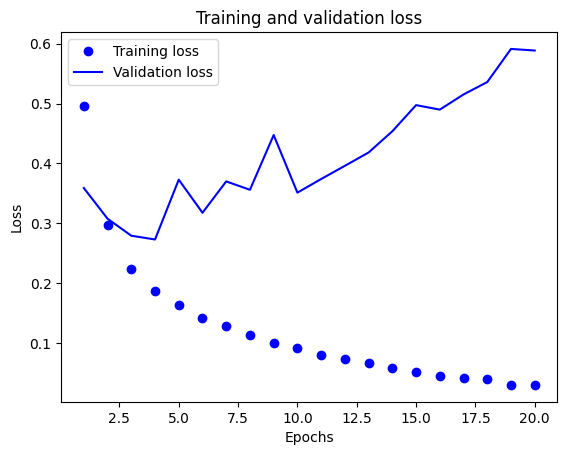

In [62]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
import numpy as np

# Load the IMDb dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Vectorize the sequences
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Convert labels to float32
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# Build the model
model = models.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model with a specific learning rate
learning_rate = 0.001
model.compile(optimizer=optimizers.RMSprop(learning_rate=learning_rate),
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.2)

# Plot the training and validation loss
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [63]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import layers, models, optimizers
import numpy as np

# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

# Vectorize the sequences
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# Define the model architecture
model = models.Sequential([
    layers.Dense(16, activation="relu", input_shape=(10000,)),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)


Epoch 1/10
40/40 [==============================] - 2s 43ms/step - loss: 0.5031 - accuracy: 0.8060 - val_loss: 0.3691 - val_accuracy: 0.8800
Epoch 2/10
40/40 [==============================] - 2s 38ms/step - loss: 0.3051 - accuracy: 0.8982 - val_loss: 0.3121 - val_accuracy: 0.8816
Epoch 3/10
40/40 [==============================] - 2s 38ms/step - loss: 0.2330 - accuracy: 0.9187 - val_loss: 0.2839 - val_accuracy: 0.8898
Epoch 4/10
40/40 [==============================] - 1s 27ms/step - loss: 0.1932 - accuracy: 0.9323 - val_loss: 0.2838 - val_accuracy: 0.8886
Epoch 5/10
40/40 [==============================] - 1s 27ms/step - loss: 0.1672 - accuracy: 0.9423 - val_loss: 0.2755 - val_accuracy: 0.8914
Epoch 6/10
40/40 [==============================] - 1s 26ms/step - loss: 0.1450 - accuracy: 0.9510 - val_loss: 0.2925 - val_accuracy: 0.8866
Epoch 7/10
40/40 [==============================] - 1s 26ms/step - loss: 0.1305 - accuracy: 0.9548 - val_loss: 0.3005 - val_accuracy: 0.8866
Epoch 8/10
40

In [64]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255

# Convert labels to one-hot encoding
train_labels = np.eye(10)[train_labels]
test_labels = np.eye(10)[test_labels]

# Define the neural network model
model = Sequential([
    Dense(512, activation="relu", input_shape=(28 * 28,)),
    Dense(10, activation="softmax")
])

# Compile the model with an optimizer specifying the learning rate
learning_rate = 0.01
optimizer = optimizers.SGD(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train the model
history = model.fit(train_images, train_labels,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
375/375 [==============================] - 5s 11ms/step - loss: 1.2083 - accuracy: 0.7297 - val_loss: 0.6705 - val_accuracy: 0.8622
Epoch 2/5
375/375 [==============================] - 3s 8ms/step - loss: 0.5811 - accuracy: 0.8645 - val_loss: 0.4673 - val_accuracy: 0.8893
Epoch 3/5
375/375 [==============================] - 3s 9ms/step - loss: 0.4584 - accuracy: 0.8831 - val_loss: 0.3980 - val_accuracy: 0.8994
Epoch 4/5
375/375 [==============================] - 4s 10ms/step - loss: 0.4039 - accuracy: 0.8938 - val_loss: 0.3613 - val_accuracy: 0.9067
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3390 - accuracy: 0.9093
Test accuracy: 0.9093000292778015


In [65]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255

# Convert labels to one-hot encoding
train_labels = np.eye(10)[train_labels]
test_labels = np.eye(10)[test_labels]

# Define the neural network model
model = Sequential([
    Dense(512, activation="relu", input_shape=(28 * 28,)),
    Dense(10, activation="softmax")
])

# Compile the model with an optimizer specifying the learning rate
learning_rate = 0.01
optimizer = optimizers.SGD(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train the model with backpropagation
history = model.fit(train_images, train_labels,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)


Epoch 1/5
375/375 [==============================] - 4s 9ms/step - loss: 1.2130 - accuracy: 0.7256 - val_loss: 0.6725 - val_accuracy: 0.8565
Epoch 2/5
375/375 [==============================] - 4s 10ms/step - loss: 0.5878 - accuracy: 0.8605 - val_loss: 0.4714 - val_accuracy: 0.8867
Epoch 3/5
375/375 [==============================] - 4s 10ms/step - loss: 0.4646 - accuracy: 0.8819 - val_loss: 0.4003 - val_accuracy: 0.8969
Epoch 4/5
375/375 [==============================] - 3s 8ms/step - loss: 0.4089 - accuracy: 0.8918 - val_loss: 0.3631 - val_accuracy: 0.9033
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3405 - accuracy: 0.9067
Test accuracy: 0.9067000150680542


In [66]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255

# Convert labels to one-hot encoding
train_labels = np.eye(10)[train_labels]
test_labels = np.eye(10)[test_labels]

# Split the original data into training, validation, and test datasets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Print the shapes of the datasets
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation images shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


Training images shape: (48000, 784)
Training labels shape: (48000, 10)
Validation images shape: (12000, 784)
Validation labels shape: (12000, 10)
Test images shape: (10000, 784)
Test labels shape: (10000, 10)


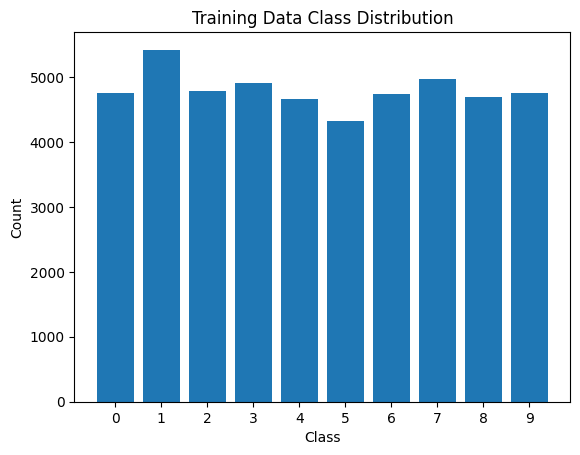

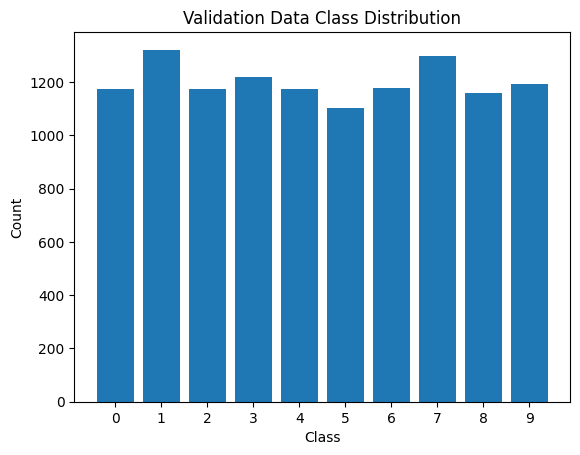

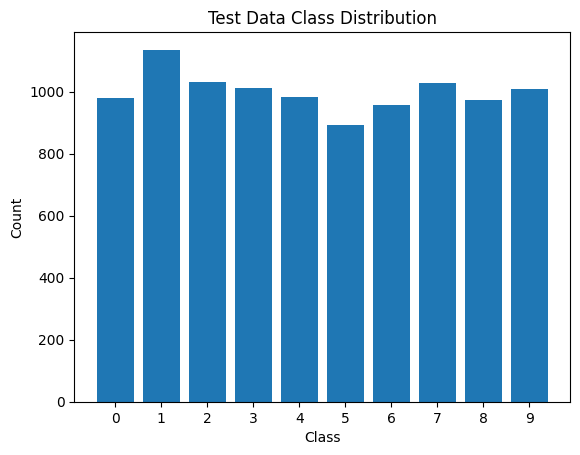

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255

# Convert labels to one-hot encoding
train_labels = np.eye(10)[train_labels]
test_labels = np.eye(10)[test_labels]

# Split the original data into training, validation, and test datasets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Function to plot class distribution
def plot_class_distribution(labels, title):
    unique_classes, class_counts = np.unique(labels.argmax(axis=1), return_counts=True)
    plt.bar(unique_classes, class_counts)
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.xticks(range(10))  # Assuming there are 10 classes (0 to 9)
    plt.show()

# Plot class distribution for training, validation, and test datasets
plot_class_distribution(train_labels, "Training Data Class Distribution")
plot_class_distribution(val_labels, "Validation Data Class Distribution")
plot_class_distribution(test_labels, "Test Data Class Distribution")


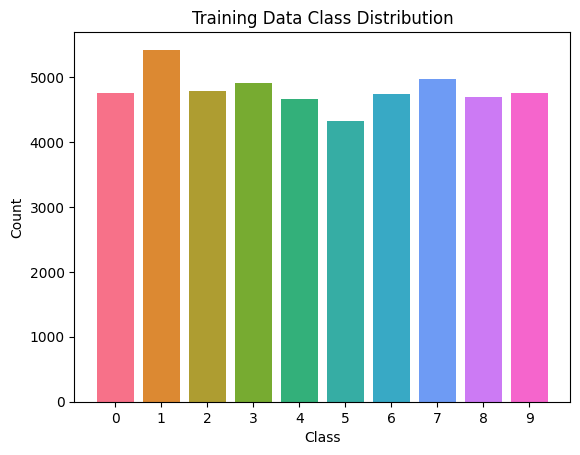

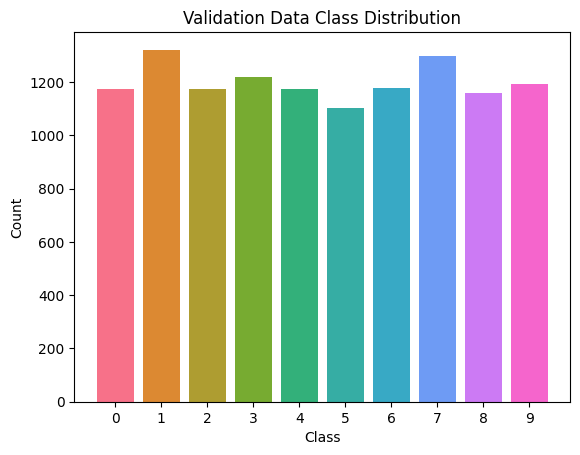

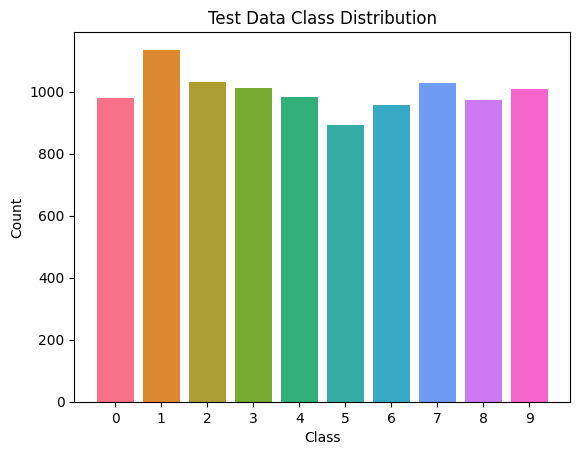

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for color palette
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255

# Convert labels to one-hot encoding
train_labels = np.eye(10)[train_labels]
test_labels = np.eye(10)[test_labels]

# Split the original data into training, validation, and test datasets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Define a color palette
palette = sns.color_palette("husl", 10)  # Generate a palette with 10 colors

# Function to plot class distribution
def plot_class_distribution(labels, title):
    unique_classes, class_counts = np.unique(labels.argmax(axis=1), return_counts=True)
    plt.bar(unique_classes, class_counts, color=[palette[i] for i in unique_classes])
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.xticks(range(10))  # Assuming there are 10 classes (0 to 9)
    plt.show()

# Plot class distribution for training, validation, and test datasets
plot_class_distribution(train_labels, "Training Data Class Distribution")
plot_class_distribution(val_labels, "Validation Data Class Distribution")
plot_class_distribution(test_labels, "Test Data Class Distribution")


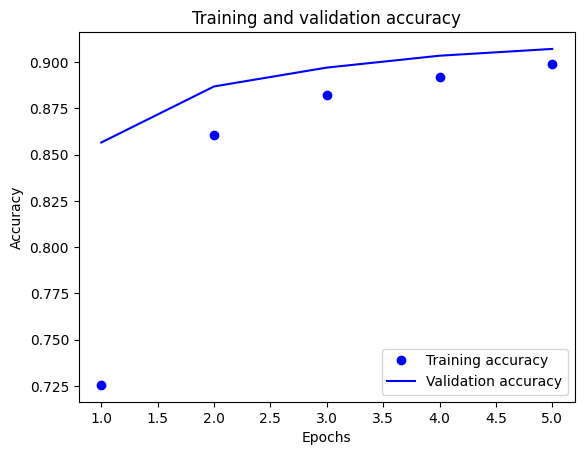

In [70]:
import matplotlib.pyplot as plt

# Function to plot training and validation accuracy
def plot_accuracy(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Plot accuracy over time
plot_accuracy(history)


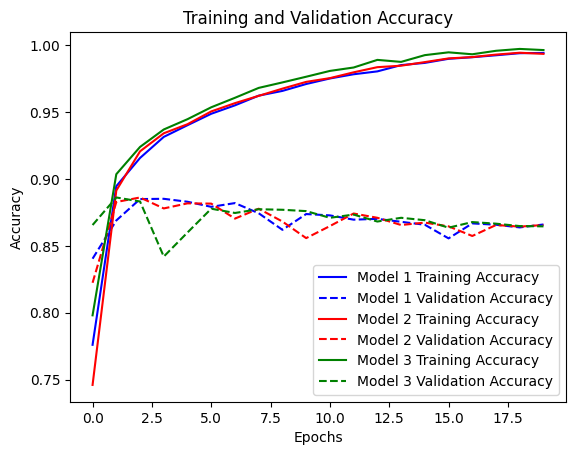

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Preprocess the data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Define a function to create and compile a model
def create_model():
    model = keras.Sequential([
        layers.Dense(16, activation='relu', input_shape=(10000,)),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Train multiple models with different configurations
num_epochs = 20
batch_size = 512

model_1 = create_model()
history_1 = model_1.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size,
                        validation_data=(x_val, y_val), verbose=0)

model_2 = create_model()
history_2 = model_2.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size,
                        validation_data=(x_val, y_val), verbose=0)

model_3 = create_model()
history_3 = model_3.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size,
                        validation_data=(x_val, y_val), verbose=0)

# Plot the training and validation accuracy over time
plt.plot(history_1.history['accuracy'], 'b-', label='Model 1 Training Accuracy')
plt.plot(history_1.history['val_accuracy'], 'b--', label='Model 1 Validation Accuracy')
plt.plot(history_2.history['accuracy'], 'r-', label='Model 2 Training Accuracy')
plt.plot(history_2.history['val_accuracy'], 'r--', label='Model 2 Validation Accuracy')
plt.plot(history_3.history['accuracy'], 'g-', label='Model 3 Training Accuracy')
plt.plot(history_3.history['val_accuracy'], 'g--', label='Model 3 Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


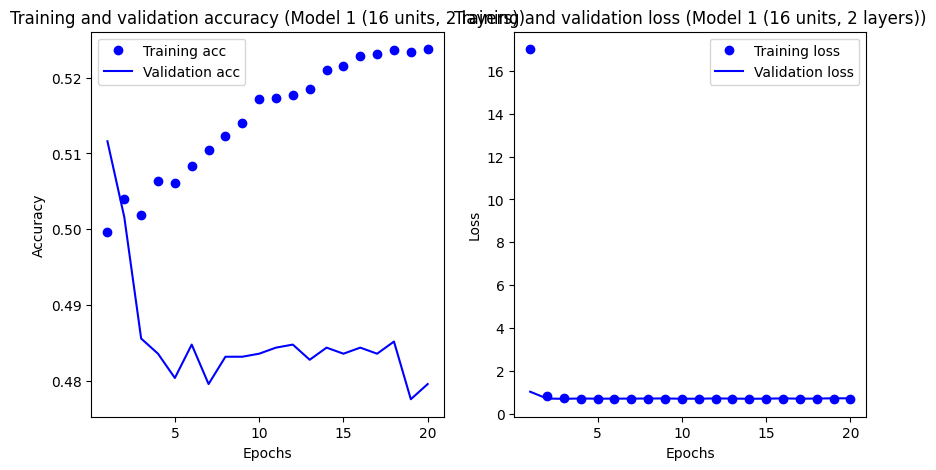

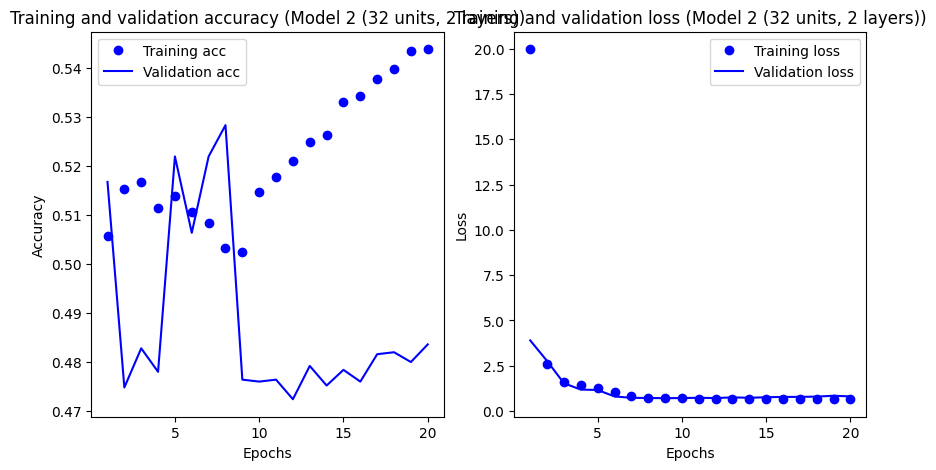

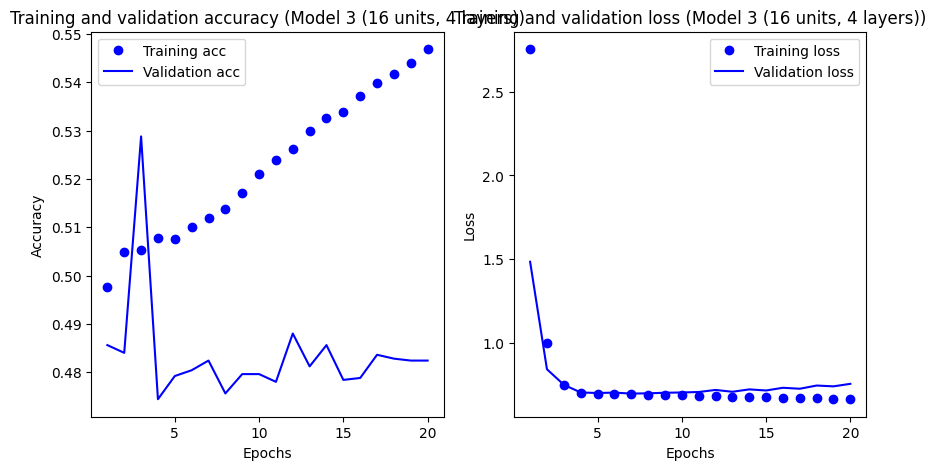

In [4]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load and preprocess data
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)
x_train = keras.preprocessing.sequence.pad_sequences(train_data, maxlen=10000)
x_test = keras.preprocessing.sequence.pad_sequences(test_data, maxlen=10000)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# Split data into training, validation, and test sets
x_train_partial, x_val, y_train_partial, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Define model architectures
def build_model(units, layers):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units, activation='relu', input_shape=(10000,)))
    for _ in range(layers-1):
        model.add(keras.layers.Dense(units, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


# Train models with different architectures
model_1 = build_model(units=16, layers=2)
model_2 = build_model(units=32, layers=2)
model_3 = build_model(units=16, layers=4)

# Train models
history_1 = model_1.fit(x_train_partial, y_train_partial,
                        epochs=20, batch_size=512,
                        validation_data=(x_val, y_val),
                        verbose=0)
history_2 = model_2.fit(x_train_partial, y_train_partial,
                        epochs=20, batch_size=512,
                        validation_data=(x_val, y_val),
                        verbose=0)
history_3 = model_3.fit(x_train_partial, y_train_partial,
                        epochs=20, batch_size=512,
                        validation_data=(x_val, y_val),
                        verbose=0)

# Plot training history
def plot_history(history, label):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title(f'Training and validation accuracy ({label})')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(f'Training and validation loss ({label})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history_1, 'Model 1 (16 units, 2 layers)')
plot_history(history_2, 'Model 2 (32 units, 2 layers)')
plot_history(history_3, 'Model 3 (16 units, 4 layers)')


### Wrapping up

## Summary